In [2]:
# se cargan Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import statistics as stats

## Carga y visualización de Archivos

Primero se cargan y visualiza la base de datos de Airbnb que incluye información de los hosts, casas en renta y ratings de estos. 

In [3]:
#Carga de archivos
mun = pd.read_csv("listings.csv", encoding='latin-1')

#Para poder ver bases completas cuando necesitamos info
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Visualización de la base original
mun.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6.510000e+17,https://www.airbnb.com/rooms/651278636295313943,2.020000e+13,27/06/2023,city scrape,Condo in Munich Â· â 4.38 Â· 1 bedroom Â· 2 b...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,286578863,https://www.airbnb.com/users/show/286578863,Tobias,17/08/2019,"Munich, Germany","Hey there, my name is Tobias, Iâm from Austr...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/a01df...,https://a0.muscache.com/im/pictures/user/a01df...,NaN,1,2,"['email', 'phone', 'work_email']",t,t,NaN,Bogenhausen,NaN,48.173418,11.635056,Entire condo,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""TV"", ""First aid kit"", ""Smoke alarm"", ""Elevat...",$104.00,1,14,1,1,1125,1125,1.0,1125.0,NaN,t,12,32,38,38,27/06/2023,24,24,4,18/09/2022,23/06/2023,4.38,4.75,4.50,4.79,4.79,4.17,4.38,NaN,t,1,1,0,0,2.54
1,5.197907e+07,https://www.airbnb.com/rooms/51979073,2.020000e+13,27/06/2023,previous scrape,Rental unit in Munich Â· â 4.61 Â· 1 bedroom ...,Enjoy the simple life in this quiet and centra...,Maxvorstadt is a bustling district: it is home...,https://a0.muscache.com/pictures/a149c822-8207...,146200788,https://www.airbnb.com/users/show/146200788,Dustin,15/08/2017,"Munich, Germany",NaN,a few days or more,33%,27%,f,https://a0.muscache.com/im/pictures/user/8d2e2...,https://a0.muscache.com/im/pictures/user/8d2e2...,NaN,1,1,"['email', 'phone']",t,t,"Munich, Bayern, Germany",Maxvorstadt,NaN,48.149384,11.576812,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Freezer"", ""Hangers"", ""Clothing storage: clos...",$72.00,5,365,3,3,365,365,3.0,365.0,NaN,t,0,0,0,0,27/06/2023,18,6,0,18/09/2021,12/03/2023,4.61,4.67,4.44,4.78,4.67,4.83,4.61,NaN,f,1,1,0,0,0.83
2,4.460563e+07,https://www.airbnb.com/rooms/44605632,2.020000e+13,27/06/2023,previous scrape,Rental unit in Munich Â· â 5.0 Â· 2 bedrooms ...,Centrally located in Munich's trending but qui...,5-min walk to trams<br />8-minute walk from po...,https://a0.muscache.com/pictures/13da8e75-9778...,7936197,https://www.airbnb.com/users/show/7936197,Waleska,04/08/2013,"Munich, Germany",With nearly 10 consecutive years living abroad...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/61ebf...,https://a0.muscache.com/im/pictures/user/61ebf...,NaN,1,2,"['email', 'phone', 'work_email']",t,t,"Munich, Bayern, Germany",SchwanthalerhÃ¶he,NaN,48.139170,11.529930,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Freezer"", ""Hangers"", ""First aid kit"", ""Coffe...",$64.00,5,1125,5,5,1125,1125,5.0,1125.0,NaN,t,0,0,0,0,27/06/2023,7,0,0,16/08/2020,20/04/2022,5.00,5.00,5.00,5.00,5.00,4.86,5.00,NaN,t,1,1,0,0,0.20
3,4.479138e+07,https://www.airbnb.com/rooms/44791381,2.020000e+13

In [4]:
#Información de la base
mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5677 non-null   float64
 1   listing_url                                   5677 non-null   object 
 2   scrape_id                                     5677 non-null   float64
 3   last_scraped                                  5677 non-null   object 
 4   source                                        5677 non-null   object 
 5   name                                          5677 non-null   object 
 6   description                                   5549 non-null   object 
 7   neighborhood_overview                         2521 non-null   object 
 8   picture_url                                   5677 non-null   object 
 9   host_id                                       5677 non-null   i

### Valores Nulos

Para limpiar la base de datos observamos los valores nulos que hay en nuestro data frame

#### Visualización

In [5]:
#Visualización del total de nulos
mun.isnull().sum().sum()

55852

In [6]:
#Visualización de nulos por columna
mun.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                      128
neighborhood_overview                           3156
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   1069
host_about                                      3204
host_response_time                              1558
host_response_rate                              1558
host_acceptance_rate                             881
host_is_superhost                             

Tratamiento de Nulos

Los nulos los trabajamos de distintas formas dependiendo del tipo de datos y a qué se refiere. El como fueron tratados se incluye en la siguiente lista

* String
    * "No Information About"
        * name
        * description
        * neighborhood_overview
        * host_location
        * host_about
        * host_response_time
        * host_neighbourhood
        * neighbourhood
        
    * "00/00/0000"
        * first_review
        * last_review
    * "W0"
        * host_is_superhost


* Mediana
    * bedrooms
    * beds
    * minimum_minimum_nights
    * maximum_minimum_nights
    * minimum_maximum_nights
    * maximum_maximum_nights
    * review_scores_value


* Media
    * maximum_maximum_nights
    * maximum_nights_avg_ntm
    * review_scores_rating
    * review_scores_accuracy
    * review_scores_cleanliness
    * review_scores_checkin
    * review_scores_communication
    * review_scores_location
    * review_scores_value
    * reviews_per_month
    * host_acceptance_rate
    * host_response_rate
    * bathrooms_text


* Eliminar columnas
    * neighbourhood_group_cleansed
    * bathrooms
    * calendar_updated
    * license

In [7]:
#Copia de Data Frame
mun2 = mun.copy()

In [8]:
#String 
    #No info
#Se agrupan las columnas a las que pondremos esta string a sus valores nulos y se cambian en el data frame
columnas_rellenar_no_info = ["name", "description", "neighborhood_overview", "host_location", "host_about", "host_response_time", "host_neighbourhood", "neighbourhood"]
mun2[columnas_rellenar_no_info] = mun2[columnas_rellenar_no_info].fillna("No information about")

In [9]:
#String
    #00/00/0000
mun2["first_review"] = mun2["first_review"].fillna("00/00/0000")
mun2["last_review"] = mun2["last_review"].fillna("00/00/0000")

In [10]:
#String 
    #Clave
mun2["host_is_superhost"] = mun2["host_is_superhost"].fillna("W0")

In [11]:
#Verificar nulos
mun2.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                        0
neighborhood_overview                              0
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      0
host_about                                         0
host_response_time                                 0
host_response_rate                              1558
host_acceptance_rate                             881
host_is_superhost                             

In [12]:
#Mediana
#Se agrupan las columnas que serán reemplazadas sus nulos por la mediana y se cambian en el data frame
columnas_rellenar_mediana = ["bedrooms", "beds", "review_scores_value", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights"]
mun2[columnas_rellenar_mediana] = mun2[columnas_rellenar_mediana].fillna(mun[columnas_rellenar_mediana].median())

In [13]:
#Verificamos nulos
mun2.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                        0
neighborhood_overview                              0
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      0
host_about                                         0
host_response_time                                 0
host_response_rate                              1558
host_acceptance_rate                             881
host_is_superhost                             

Problemas con la variable host_acceptance_rate, host_response_rate y bathrooms_text:

Las variables host_acceptance_rate y host_response_rate tienen símbolo de %, por lo que tuvieron que ser tratados de manera distinta, los pasos que se siguieron son los siguientes:

* Crear una nueva base con solo esta columna
* Quitar "%"
* Pasarlo a float
* Quitar valores nulos
* Calcular media
* Directamente cambiar en la columna del data frame con el valor de la media exacto, es decir, si la media fue 67, usar la línea:

    mun2["host_acceptance_rate"] = mun2["host_acceptance_rate"].fillna(67)
    
* Cambiarlo a float en el data frame en caso de ser necesario.

In [14]:
#HOST_ACCEPTANCE_RATE
#Se crea el nuevo df, se quita % y se pasa a float
host_acceptance_rate_df = mun.iloc[ : , [17]]
host_acceptance_rate_df = host_acceptance_rate_df["host_acceptance_rate"].str.replace("%", "").astype(float)
host_acceptance_rate_df.head()

0    100.0
1     27.0
2      NaN
3      NaN
4     50.0
Name: host_acceptance_rate, dtype: float64

In [15]:
#Calcular media quitando NAs
host_acceptance_rate_df = host_acceptance_rate_df.dropna()
print(stats.mean(host_acceptance_rate_df))

73.064011676397


In [16]:
#Lo cambiamos en nuestro data frame original
mun2["host_acceptance_rate"] = mun2["host_acceptance_rate"].str.replace("%", "").astype(float)
mun2["host_acceptance_rate"] = mun2["host_acceptance_rate"].fillna(stats.mean(host_acceptance_rate_df))

In [17]:
#HOST_RESPONSE_RATE
#Se crea el nuevo df, se quita % y se pasa a float
host_response_rate_df = mun.iloc[ : , [16]]
host_response_rate_df = host_response_rate_df["host_response_rate"].str.replace("%", "").astype(float)
host_response_rate_df.head()

0    100.0
1     33.0
2      NaN
3      NaN
4      NaN
Name: host_response_rate, dtype: float64

In [18]:
#Calcular media quitando NAs
host_response_rate_df = host_response_rate_df.dropna()
print(stats.mean(host_response_rate_df))

87.45714979363923


In [19]:
#Lo cambiamos en nuestro data frame original
mun2["host_response_rate"] = mun2["host_response_rate"].str.replace("%", "").astype(float)
mun2["host_response_rate"] = mun2["host_response_rate"].fillna(stats.mean(host_response_rate_df))

Para la variable bathrooms_text se siguieron los siguientes pasos:

* Crear un nuevo data frame solo con esa variable
* Se quitaron los valores nulos
* Se quitaron algunos strings como "bath", "baths", entre otros 
* Se volvieron a quitar valores nulos
* Se paso a float el objeto
* Se calcula el promedio de baños
* Se cambia en el data frame original, quitando los strings, camnbiando los nulos por el promedio y transformándolo en float

In [20]:
#BATHROOMS_TEXT
 #Se crea el nuevo df, se quita % y se pasa a float
bathrooms_text_df = mun2.iloc[ : , [36]]
bathrooms_text_df = bathrooms_text_df.dropna()
bathrooms_text_df["bathrooms_text"] = bathrooms_text_df["bathrooms_text"].replace({"Half-bath": 0.5, "Shared half-bath":0.5, "Private half-bath":0.5, "":""}, regex = True)
bathrooms_text_df = bathrooms_text_df["bathrooms_text"].replace({"bath":"", "s":"", " ":"", "hared":"", "private":"", "Half-":""}, regex = True)
bathrooms_text_df = bathrooms_text_df.dropna()
bathrooms_floats = [float(elemento) for elemento in bathrooms_text_df]
bathrooms_floats
promedio_bathrooms = sum(bathrooms_floats) / len(bathrooms_floats)
print("Promedio:", promedio_bathrooms)

Promedio: 1.159996473906911


In [21]:
#Lo cambiamos en nuestro data frame original
mun2["bathrooms_text"] = mun2["bathrooms_text"].replace({"Half-bath": 0.5, "Shared half-bath":0.5, "Private half-bath":0.5, "":""}, regex = True)
mun2["bathrooms_text"] = mun2["bathrooms_text"].replace({"bath":"", "s":"", " ":"", "hared":"", "private":"", "Half-":""}, regex = True)
mun2["bathrooms_text"] = mun2["bathrooms_text"].fillna(1)
mun2["bathrooms_text"] = mun2["bathrooms_text"].astype(float)

In [22]:
#Media
#Se agrupan todas las variables en una mismo objeto y se cambian por la media en el data frame principal
columnas_rellenar_media = ["maximum_maximum_nights", "maximum_nights_avg_ntm", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month", "minimum_nights_avg_ntm"]
mun2[columnas_rellenar_media] = mun2[columnas_rellenar_media].fillna(mun[columnas_rellenar_media].mean())

In [23]:
#Verificamos nulos
mun2.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                        0
neighborhood_overview                              0
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      0
host_about                                         0
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                             

In [24]:
#Eliminar columnas (se eliminan porque todos sus datos son nulos)
    #neighbourhood_group_cleansed
    #bathrooms
    #calendar_updated
    #license

mun2 = mun2.drop(["neighbourhood_group_cleansed", "bathrooms", "calendar_updated", "license"], axis=1)

In [25]:
#Verificamos nulos
mun2.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0


En este punto también le quitamos el signo de $ y de , en el data frame y lo pasamos a float para tener más facilidad de visualizar las estadísticas de estos datos más adelante

In [26]:
#Quitamos signo de pesos $ a price
mun2["price"] = mun2["price"].str.replace("$", "")
mun2["price"] = mun2["price"].replace({",":""}, regex = True).astype(float)
mun2["price"].head()

0    104.0
1     72.0
2     64.0
3     48.0
4    379.0
Name: price, dtype: float64

In [27]:
#Verificamos nulos completos
mun2.isnull().sum().sum()

0

### Valores atípicos

Para los valores atípicos primero se dividió la base de datos en dos data frames: Cualitativos y Cuantitativos. Sin embargo, hay algunas variables como ID que, aunqeu son números, no tratermos como outliers porque son claves, no datos numéricos. La división de los nuevos data frames es:

#### División de cuantitativos
 16  host_response_rate
 
 17  host_acceptance_rate

 22  host_listings_count                             
 23  host_total_listings_count                       

 33  accommodates                                   

 35  bedrooms                                       
 36  beds                                           

 39  minimum_nights                                  
 40  maximum_nights                                  
 41  minimum_minimum_nights                         
 42  maximum_minimum_nights                         
 43  minimum_maximum_nights                         
 44  maximum_maximum_nights                         
 45  minimum_nights_avg_ntm                         
 46  maximum_nights_avg_ntm                         

 48  availability_30                                 
 49  availability_60                                 
 50  availability_90                                 
 51  availability_365                               

 53  number_of_reviews                             
 54  number_of_reviews_ltm                         
 55  number_of_reviews_l30d                        

 58  review_scores_rating                          
 59  review_scores_accuracy                        
 60  review_scores_cleanliness                     
 61  review_scores_checkin                         
 62  review_scores_communication                   
 63  review_scores_location                        
 64  review_scores_value                           
 
 66  calculated_host_listings_count                
 67  calculated_host_listings_count_entire_homes   
 68  calculated_host_listings_count_private_rooms  
 69  calculated_host_listings_count_shared_rooms   
 70  reviews_per_month  


Por otro lado, no consideramos la columna Price como que tuviera Outlier, porque este valor es dependiente a muchas otras variables, tanto cualitativas como cuantitativas (como localidad, ciudad, número de baños o recámaras, etc). 

In [28]:
#Cuantitativas
#Se dividen en mini data frames seleccionando solo aquellas columnas que necesitamos y luego se concatenan en uno solo
cuan0 = mun2.iloc[ : , [16,17]]
cuan1 = mun2.iloc[ : , [22,23]] 
cuan2 = mun2.iloc[ : , [33, 34]]
cuan3 = mun2.iloc[ : , [35,36]]
cuan4 = mun2.iloc[ : , 39:47]   
cuan5 = mun2.iloc[ : , 48:52] 
cuan6 = mun2.iloc[ : , 53:56]
cuan7 = mun2.iloc[ : , 58:64]
cuan8 = mun2.iloc[ : , 66:71]
cuanti_mun = pd.concat([cuan0, cuan1, cuan2, cuan3, cuan4, cuan5, cuan6, cuan7, cuan8], axis=1)
cuanti_mun.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')

In [29]:
#Para crear el dataframe de cualitativas, solo se "restan" aquellas variables que ya ocupamos del dataframe de cuantitatuvas
columnas_a_eliminar = cuanti_mun.columns
cuali_mun = mun2.drop(columns=columnas_a_eliminar)
cuali_mun.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [30]:
#Visualizamos info de nuevo df
cuanti_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            5677 non-null   float64
 1   host_acceptance_rate                          5677 non-null   float64
 2   host_listings_count                           5677 non-null   int64  
 3   host_total_listings_count                     5677 non-null   int64  
 4   accommodates                                  5677 non-null   int64  
 5   bathrooms_text                                5677 non-null   float64
 6   bedrooms                                      5677 non-null   float64
 7   beds                                          5677 non-null   float64
 8   minimum_nights                                5677 non-null   int64  
 9   maximum_nights                                5677 non-null   i

#### Visualización de valores atípicos

<Figure size 1500x800 with 0 Axes>

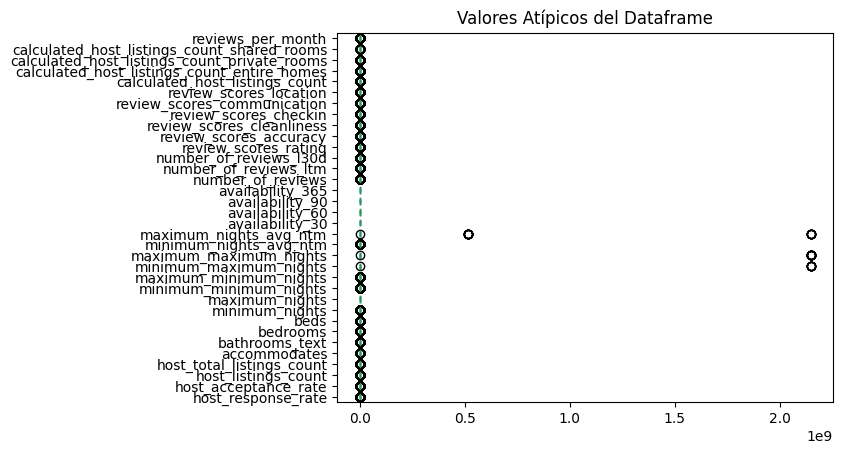

In [31]:
#Visualizamos los outliers de las variables que seleccionamos
fig = plt.figure(figsize =(15, 8))
cuanti_mun.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

#### Tratamiento de Outliers
Por desviación estándar

Se decidió este método porque permite dar más variación a los datos y así no tener distribuciones más sesgadas

In [32]:
#Tratamiento con desviación estándar
    #Marcamos límites
y = cuanti_mun
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_response_rate                              1.527672e+02
host_acceptance_rate                            1.599367e+02
host_listings_count                             8.587949e+01
host_total_listings_count                       9.754519e+01
accommodates                                    7.695764e+00
bathrooms_text                                  3.451552e+00
bedrooms                                        4.415852e+00
beds                                            6.411799e+00
minimum_nights                                  1.025130e+02
maximum_nights                                  1.827475e+03
minimum_minimum_nights                          1.002604e+02
maximum_minimum_nights                          1.048663e+02
minimum_maximum_nights                          2.287539e+08
maximum_maximum_nights                          3.793041e+08
minimum_nights_avg_ntm                          1.023582e+02
maximum_nights_avg_ntm                          2.407092e+0

In [33]:
#Observamos valores atípicos del data frame
outliers_cuan_mun= cuanti_mun[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_cuan_mun.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Hacemos el cambio a un nuevo data frame
cuanti_mun_limpio_out = cuanti_mun[(y<=Limite_Superior)&(y>=Limite_Inferior)]
cuanti_mun_limpio_out.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100.00000,100.000000,1.0,2.0,3.0,1.0,1.0,2.0,1.0,14,1.0,1.0,1125.0,1125.0,1.0,1125.0,12,32,38,38,24.0,24.0,4.0,4.380000,4.750000,4.50000,4.790000,4.790000,4.170000,1.0,1.0,0.0,0.0,2.540000
1,33.00000,27.000000,1.0,1.0,2.0,1.0,1.0,2.0,5.0,365,3.0,3.0,365.0,365.0,3.0,365.0,0,0,0,0,18.0,6.0,0.0,4.610000,4.670000,4.44000,4.780000,4.670000,4.830000,1.0,1.0,0.0,0.0,0.830000
2,87.45715,73.064012,1.0,2.0,4.0,1.0,2.0,2.0,5.0,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,0,0,0,0,7.0,0.0,0.0,5.000000,5.000000,5.00000,5.000000,5.000000,4.860000,1.0,1.0,0.0,0.0,0.200000
3,87.45715,73.064012,1.0,4.0,2.0,1.0,1.0,1.0,6.0,14,6.0,6.0,1125.0,1125.0,6.0,1125.0,0,0,0,0,7.0,0.0,0.0,4.860000,5.000000,4.57000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,0.200000
4,87.45715,50.000000,1.0,1.0,6.0,1.0,2.0,2.0,2.0,14,2.0,2.0,14.0,14.0,2.0,14.0,0,0,0,0,0.0,0.0,0.0,4.758789,4.808931,4.72205,4.844721,4.852969,4.785207,1.0,1.0,0.0,0.0,0.976951


In [35]:
#Vemos valores nulos
cuanti_mun_limpio_out.isnull().sum()

host_response_rate                              249
host_acceptance_rate                              0
host_listings_count                              13
host_total_listings_count                        13
accommodates                                    121
bathrooms_text                                   30
bedrooms                                         33
beds                                             56
minimum_nights                                   87
maximum_nights                                    0
minimum_minimum_nights                           83
maximum_minimum_nights                           90
minimum_maximum_nights                            7
maximum_maximum_nights                           19
minimum_nights_avg_ntm                           87
maximum_nights_avg_ntm                           19
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability

In [36]:
#Cambiamos nuevo nulos a media
cuanti_mun_limpio_out_mean = cuanti_mun_limpio_out.copy()
cuanti_mun_limpio_out_mean = cuanti_mun_limpio_out.fillna(cuanti_mun_limpio_out.mean())
cuanti_mun_limpio_out_mean.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100.00000,100.000000,1.0,2.0,3.0,1.0,1.0,2.0,1.0,14,1.0,1.0,1125.0,1125.0,1.0,1125.0,12,32,38,38,24.0,24.0,4.0,4.380000,4.750000,4.50000,4.790000,4.790000,4.170000,1.0,1.0,0.0,0.0,2.540000
1,33.00000,27.000000,1.0,1.0,2.0,1.0,1.0,2.0,5.0,365,3.0,3.0,365.0,365.0,3.0,365.0,0,0,0,0,18.0,6.0,0.0,4.610000,4.670000,4.44000,4.780000,4.670000,4.830000,1.0,1.0,0.0,0.0,0.830000
2,87.45715,73.064012,1.0,2.0,4.0,1.0,2.0,2.0,5.0,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,0,0,0,0,7.0,0.0,0.0,5.000000,5.000000,5.00000,5.000000,5.000000,4.860000,1.0,1.0,0.0,0.0,0.200000
3,87.45715,73.064012,1.0,4.0,2.0,1.0,1.0,1.0,6.0,14,6.0,6.0,1125.0,1125.0,6.0,1125.0,0,0,0,0,7.0,0.0,0.0,4.860000,5.000000,4.57000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,0.200000
4,87.45715,50.000000,1.0,1.0,6.0,1.0,2.0,2.0,2.0,14,2.0,2.0,14.0,14.0,2.0,14.0,0,0,0,0,0.0,0.0,0.0,4.758789,4.808931,4.72205,4.844721,4.852969,4.785207,1.0,1.0,0.0,0.0,0.976951


<Figure size 1500x800 with 0 Axes>

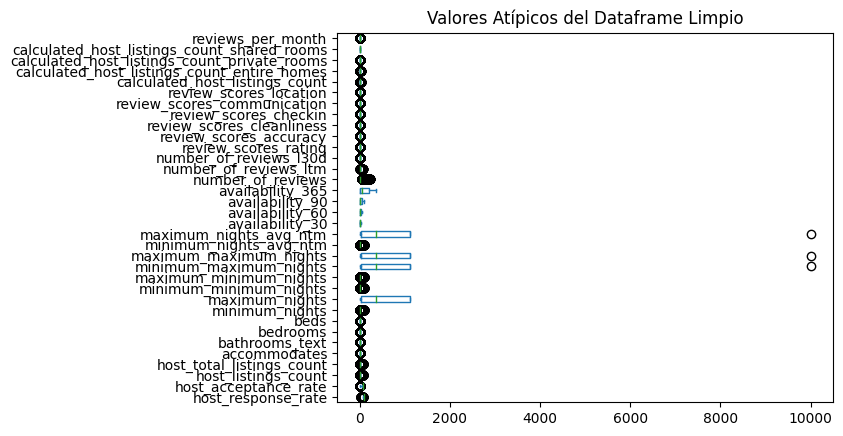

In [37]:
#Volvemos a observar en diagrama de cajas
fig = plt.figure(figsize =(15, 8))
cuanti_mun_limpio_out_mean.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe Limpio")
plt.show()

Observamos que hay nuevos valores atípicos porque la variación de datos cambia y se crean nuevos outliers, sin embargo, no se debe volver a aplicar ningún método para tratar los outliers porque eso cerraría la variabilidad de los datos y seguramente se crean nuevos outliers.

Juntamos los dos data frames

In [38]:
#Se concatenan las bases de cualitativas y cuantitativas
mun3 = pd.concat([cuanti_mun_limpio_out_mean, cuali_mun], axis = 1)
mun3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            5677 non-null   float64
 1   host_acceptance_rate                          5677 non-null   float64
 2   host_listings_count                           5677 non-null   float64
 3   host_total_listings_count                     5677 non-null   float64
 4   accommodates                                  5677 non-null   float64
 5   bathrooms_text                                5677 non-null   float64
 6   bedrooms                                      5677 non-null   float64
 7   beds                                          5677 non-null   float64
 8   minimum_nights                                5677 non-null   float64
 9   maximum_nights                                5677 non-null   i

In [39]:
#CSV
mun3.to_csv("MunichLimpio.csv")

#### Visualización de datos

##### Porcentaje de Aceptación de acuerdo a si es un Host verificado o no
En este primer gráfico, queremos observar si aquellos hosts verificados tenían mayor porcentaje de aceptación que aquellos que no están verificados. Vemos que esto es cierto, pues al menos los verificados tienen una tasa de 100% de aceptación en más de 1200 casos, mientras que los no verificados en menos de 200 casos.

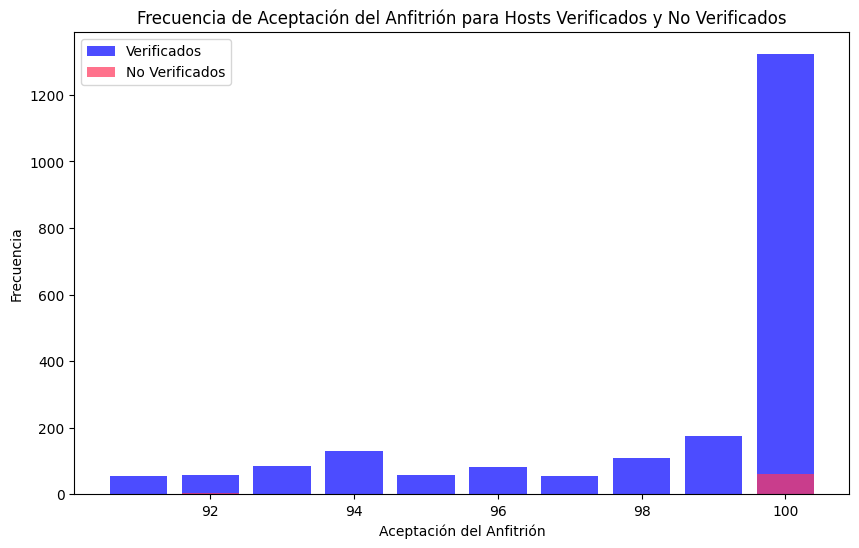

In [40]:
# Filtramos el DataFrame para incluir solo registros verificados y aceptación mayor a 90
verificados = mun3[(mun3["host_identity_verified"] == "t") & (mun3["host_acceptance_rate"] > 90)]
no_verificados = mun3[(mun3["host_identity_verified"] == "f") & (mun3["host_acceptance_rate"] > 90)]

# Subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Se crean tablas de frecuencias de aceptación del anfitrión para los registros verificados y no verificados
freq_table_verificados = verificados["host_acceptance_rate"].value_counts()
freq_table_no_verificados = no_verificados["host_acceptance_rate"].value_counts()

# Se crean los histogramas de los resultados para verificados y no verificados
ax.bar(freq_table_verificados.index, freq_table_verificados, color='blue', alpha=0.7, label='Verificados')
ax.bar(freq_table_no_verificados.index, freq_table_no_verificados, color='#ff375b', alpha=0.7, label='No Verificados')
ax.set_title("Frecuencia de Aceptación del Anfitrión para Hosts Verificados y No Verificados")
ax.set_xlabel("Aceptación del Anfitrión")
ax.set_ylabel("Frecuencia")
ax.legend()

plt.show()


##### Precio y rating de la casa
También deseamos saber cómo es la variabilidad de precios dependiendo de el rating que tenga la propiedad.

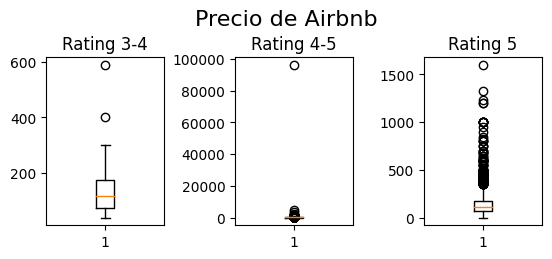

In [41]:
#Creamos categorías de rating
rat0 = mun3[mun3["review_scores_rating"] < 1]
rat1 = mun3[(mun3["review_scores_rating"] >= 1) & (mun3["review_scores_rating"] < 2)]
rat2 = mun3[(mun3["review_scores_rating"] >= 2) & (mun3["review_scores_rating"] < 3)]
rat3 = mun3[(mun3["review_scores_rating"] >= 3) & (mun3["review_scores_rating"] < 4)]
rat4 = mun3[(mun3["review_scores_rating"] >= 4) & (mun3["review_scores_rating"] < 5)]
rat5 = mun3[(mun3["review_scores_rating"] >= 5) & (mun3["review_scores_rating"] < 6)]

# rat0, rat1 y rat2 no tienen datos

plt.subplot(231)
plt.boxplot(rat3["price"])
plt.title("Rating 3-4")


plt.subplot(232)
plt.boxplot(rat4["price"])
plt.title("Rating 4-5")
plt.subplots_adjust(wspace = 0.6)

plt.subplot(233)
plt.boxplot(rat5["price"])
plt.title("Rating 5")

plt.suptitle("Precio de Airbnb", fontsize=16)

plt.show()

En este caso, el precio no define la calificación que se le da a la propiedad y al servicio, por lo que no podemos confirmar que a mayor precio, mejor calidad y por ello mejor rating.

##### Calificación de la comunicación y efectividad de la respuesta del host
Por otro lado queremos saber si hay relación entre la tasa de respuesta (en porcentaje) y la calificación que se le dio a la comunicación

Text(0, 0.5, 'Calificación de la comunicación')

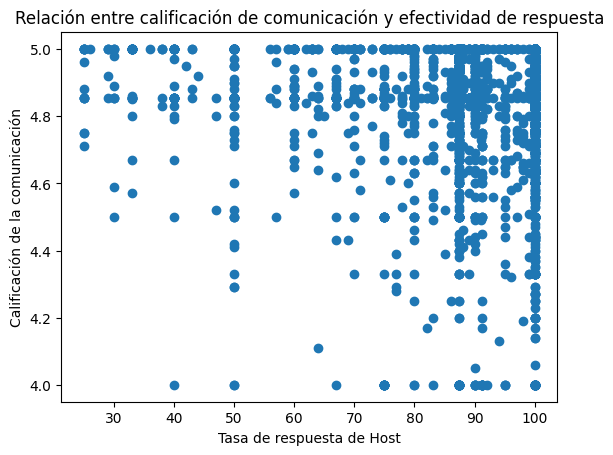

In [42]:
#review_scores_communication y host_response_rate
plt.scatter(mun3["host_response_rate"], mun3["review_scores_communication"])
plt.title("Relación entre calificación de comunicación y efectividad de respuesta")
plt.xlabel("Tasa de respuesta de Host")
plt.ylabel("Calificación de la comunicación")

Observamos que hay datos muy dispersos y al menos no hay una línea clara de dirección, sin embargo, vemos que la tendencia está que entre mayor tasa de respuesta, mejor calificación en la comunicación obtienen.

##### Tipo de propiedad con número de recamaras

Por otro lado, deseamos saber cuántas recámaras tienen las propiedades dependiendo del tipo de propiedad, para eso se creó el siguiente gráfico de barras:

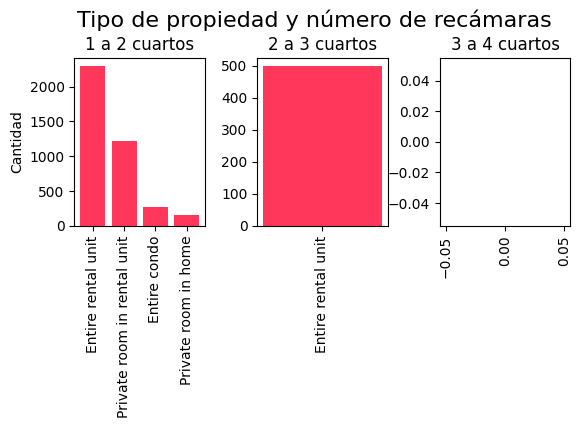

In [43]:
#Categorías por número de bedrooms
bed1 = mun3[(mun3["bedrooms"] >= 1) & (mun3["bedrooms"] < 2)]
bed2 = mun3[(mun3["bedrooms"] >= 2) & (mun3["bedrooms"] < 3)]
bed3 = mun3[(mun3["bedrooms"] >= 3) & (mun3["bedrooms"] < 4)]
bed4 = mun3[(mun3["bedrooms"] > 5)]

#Se hacen los subplots
plt.subplot(231)
plt.subplots_adjust(wspace=0.4)
property_counts = bed1["property_type"].value_counts()
property_counts_filtered = property_counts[property_counts > 150]
plt.bar(property_counts_filtered.index, property_counts_filtered.values, color = "#ff375b")
plt.ylabel("Cantidad")
plt.title("1 a 2 cuartos")
plt.xticks(rotation=90)

plt.subplot(232)
property_counts = bed2["property_type"].value_counts()
property_counts_filtered = property_counts[property_counts > 150]
plt.bar(property_counts_filtered.index, property_counts_filtered.values, color = "#ff375b")
plt.title("2 a 3 cuartos")
plt.xticks(rotation=90)

plt.subplot(233)
property_counts = bed3["property_type"].value_counts()
property_counts_filtered = property_counts[property_counts > 150]
plt.bar(property_counts_filtered.index, property_counts_filtered.values, color = "#ff375b")
plt.title("3 a 4 cuartos")
plt.xticks(rotation=90)

plt.suptitle("Tipo de propiedad y número de recámaras", fontsize=16)

plt.show()


Observamos que en Munich no hay propiedades con más de 3 cuartos, por lo que las casas en sí, son más pequeñas que la de México.

##### Reviews de cada lugar
Finalmente queremos saber cuáles son los lugares más buscados en México. Para ello se seleccionaron aquellas 4 ciudades que más aparecieran en nuestro data frame y finalmente se hicieron histogramas para ver la distribución de los datos

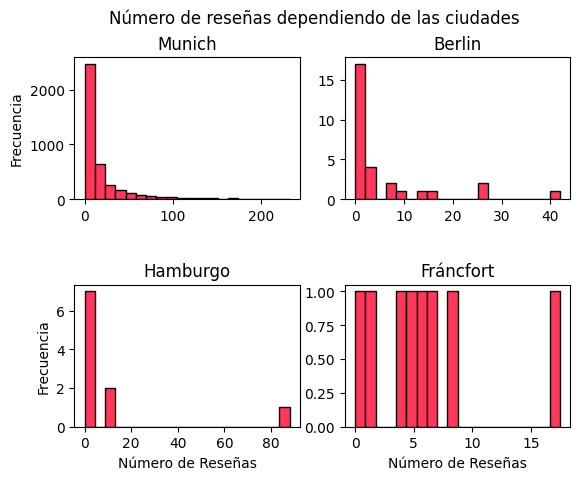

In [44]:
#reviews_per_month
#host_location

#Se buscan las que más aparecen
mun3["host_location"].value_counts()

#Se crean categorías de cada ciudad
munich_df = mun3[((mun3["host_location"] == "Munich, Germany") | (mun3["host_location"] == "MÃ¼nchen, Germany"))]
berlin_df = mun3[mun3["host_location"] == "Berlin, Germany"]
hamburg_df = mun3[mun3["host_location"] == "Hamburg, Germany"]
frankfurt_df = mun3[mun3["host_location"] == "Frankfurt, Germany"]

# #Se gráfica
plt.subplot(221)
plt.hist(munich_df["number_of_reviews"], bins=20, color='#ff375b', edgecolor='black')
plt.title("Munich")
plt.ylabel("Frecuencia")

plt.subplot(222)
plt.hist(berlin_df["number_of_reviews"], bins=20, color='#ff375b', edgecolor='black')
plt.title("Berlin")

plt.subplot(223)
plt.hist(hamburg_df["number_of_reviews"], bins=20, color='#ff375b', edgecolor='black')
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.title("Hamburgo")
plt.xlabel("Número de Reseñas")
plt.ylabel("Frecuencia")

plt.subplot(224)
plt.hist(frankfurt_df["number_of_reviews"], bins=20, color='#ff375b', edgecolor='black')
plt.title("Fráncfort")
plt.xlabel("Número de Reseñas")

plt.suptitle("Número de reseñas dependiendo de las ciudades")

plt.show()


Observamos que Munich y Berlin son las más Buscadas pero la diferencia es enorme.